 Fecha de realización: 17/07/2022
 
* Se ha creado una nueva variable concatenando los tres targets como una sola cadena de texto.

In [74]:
import pycaret
import pandas as pd


In [75]:
#Cargamos el dataset desde nuestro directorio de trabajo
df = pd.read_csv("/media/dsg/TOSHIBA EXT/PhD/DATA/XRF_trainning_100_x_100_duplicado.csv") #directorio de trabajo
#Inspeccionamos el dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260 entries, 0 to 2259
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2260 non-null   int64  
 1   Group       2260 non-null   object 
 2   Subgroup    2260 non-null   object 
 3   Hey's CIM   2260 non-null   object 
 4   target      2260 non-null   object 
 5   Mg          2260 non-null   float64
 6   Al          2260 non-null   float64
 7   Si          2260 non-null   float64
 8   P           2260 non-null   float64
 9   S           2260 non-null   float64
 10  Cl          2260 non-null   float64
 11  K           2260 non-null   float64
 12  Ca          2260 non-null   float64
 13  Sc          2260 non-null   float64
 14  Ti          2260 non-null   float64
 15  V           2260 non-null   float64
 16  Cr          2260 non-null   float64
 17  Mn          2260 non-null   float64
 18  Fe          2260 non-null   float64
 19  Co          2260 non-null  

In [76]:
# Eliminamos columnas innecesarias para nuestro experimiento
df = df.drop(['Unnamed: 0', 'suma', 'Subgroup', "Hey's CIM"], axis=1)
#Comprobamos que no hay valores faltantes
df.isnull().any().any()


False

In [77]:

df = df.drop(['Group '], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260 entries, 0 to 2259
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  2260 non-null   object 
 1   Mg      2260 non-null   float64
 2   Al      2260 non-null   float64
 3   Si      2260 non-null   float64
 4   P       2260 non-null   float64
 5   S       2260 non-null   float64
 6   Cl      2260 non-null   float64
 7   K       2260 non-null   float64
 8   Ca      2260 non-null   float64
 9   Sc      2260 non-null   float64
 10  Ti      2260 non-null   float64
 11  V       2260 non-null   float64
 12  Cr      2260 non-null   float64
 13  Mn      2260 non-null   float64
 14  Fe      2260 non-null   float64
 15  Co      2260 non-null   float64
 16  Ni      2260 non-null   float64
 17  Cu      2260 non-null   float64
 18  Zn      2260 non-null   float64
 19  Ga      2260 non-null   float64
 20  Ge      2260 non-null   float64
 21  As      2260 non-null   float64
 22  

In [78]:
# Distribución en el target_Group
target = df['target'].value_counts()
target

VarisciteVariscitePhosphates of Al alone                           791
MicaDioctahedral micaAluminosilicates of K                         448
Pyrophyllite-TalcTalcSilicates of Mg not containing Al             158
ChloriteChloriteAluminosilicates of Fe and Mg                      146
ChloritoidMagnesiochloritoid Aluminosilicates of Mg                 84
                                                                  ... 
MicaDioctahedral mica Aluminosilicates of K                          1
PalygorskitePalygorskiteAluminosilicates of Mg                       1
AmphiboleHornblendeSilicates of Fe, Mg, Ca not containing Al         1
Kaolinite-SerpentineSerpentineSilicates of Mg not containing Al      1
TourmalineTourmalineAluminosilicates of K                            1
Name: target, Length: 87, dtype: int64

<AxesSubplot:>

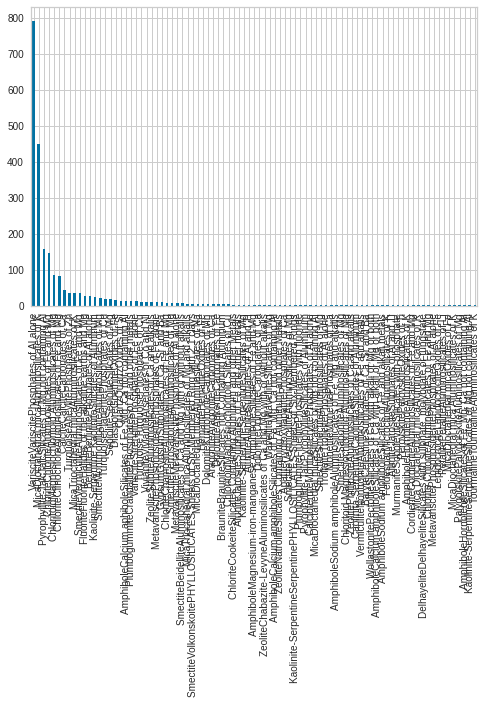

In [79]:
# Visaulizamos el gran desbalance en los datos
target.plot(kind='bar')

In [80]:
#Eliminación de casos. Clases <10 para el target_Group
casos = target[target <10]
values = casos.index
values
deleted_cases= df[df["target"].isin(values)]
case_del = deleted_cases.index
df.drop(case_del, inplace=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2103 entries, 1 to 2259
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  2103 non-null   object 
 1   Mg      2103 non-null   float64
 2   Al      2103 non-null   float64
 3   Si      2103 non-null   float64
 4   P       2103 non-null   float64
 5   S       2103 non-null   float64
 6   Cl      2103 non-null   float64
 7   K       2103 non-null   float64
 8   Ca      2103 non-null   float64
 9   Sc      2103 non-null   float64
 10  Ti      2103 non-null   float64
 11  V       2103 non-null   float64
 12  Cr      2103 non-null   float64
 13  Mn      2103 non-null   float64
 14  Fe      2103 non-null   float64
 15  Co      2103 non-null   float64
 16  Ni      2103 non-null   float64
 17  Cu      2103 non-null   float64
 18  Zn      2103 non-null   float64
 19  Ga      2103 non-null   float64
 20  Ge      2103 non-null   float64
 21  As      2103 non-null   float64
 22  

In [82]:
# Comprobamos la cantidad de clases de nuestro target despues de eliminar las clases menores
df['target'].nunique()

25

In [83]:
# Distribución de casos por clase despues de eliminar clases menores
df['target'].value_counts()

VarisciteVariscitePhosphates of Al alone                              791
MicaDioctahedral micaAluminosilicates of K                            448
Pyrophyllite-TalcTalcSilicates of Mg not containing Al                158
ChloriteChloriteAluminosilicates of Fe and Mg                         146
ChloritoidMagnesiochloritoid Aluminosilicates of Mg                    84
ChloriteClinochloreAluminosilicates of Fe and Mg                       82
CalciteCalciteCarbonates of Ca                                         44
TurquoiseAheylitePhosphates of Zn                                      36
SmectiteVermiculiteAluminosilicates of Fe and Mg                       35
MicaTrioctahedral micaAluminosilicates of K                            35
FluoriteFluoriteHalides of the alkaline earths and Mg                  28
BerliniteBerlinitePhosphates of Al alone                               26
Kaolinite-Serpentine KaoliniteSilicates of Aluminum                    25
SmectiteMontmorilloniteAluminosilicate

<AxesSubplot:>

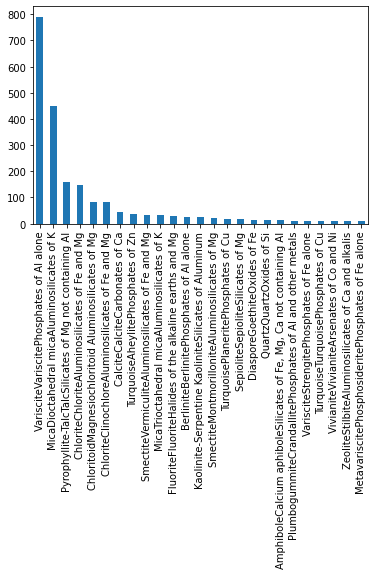

In [24]:
df['target'].value_counts().plot(kind='bar')

In [84]:
# Importamos libreria para gestionar el desbalance en nuestro dataset
import imblearn
from imblearn.over_sampling import SMOTE # Oversamplig
# Undersample and plot imbalanced dataset with the Condensed Nearest Neighbor Rule

from imblearn.under_sampling import CondensedNearestNeighbour #Undersampling
from imblearn.under_sampling import EditedNearestNeighbours

In [85]:
#Dividimos el dataset en subsets de antrenamiento y validación
#además dejamos una porción de la data sin usar para la evaluación final
data = df.sample(frac=0.90, random_state=786)
data_unseen_final = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen_final.reset_index(inplace=True, drop=True)
print('Data para el modelo: ' + str(data.shape))
print('Data para evaluación final: ' + str(data_unseen_final.shape))

Data para el modelo: (1893, 46)
Data para evaluación final: (210, 46)


MicaDioctahedral micaAluminosilicates of K                            205
VarisciteVariscitePhosphates of Al alone                              204
Pyrophyllite-TalcTalcSilicates of Mg not containing Al                158
ChloriteChloriteAluminosilicates of Fe and Mg                         146
ChloritoidMagnesiochloritoid Aluminosilicates of Mg                    84
ChloriteClinochloreAluminosilicates of Fe and Mg                       82
CalciteCalciteCarbonates of Ca                                         44
TurquoiseAheylitePhosphates of Zn                                      36
SmectiteVermiculiteAluminosilicates of Fe and Mg                       35
MicaTrioctahedral micaAluminosilicates of K                            35
FluoriteFluoriteHalides of the alkaline earths and Mg                  28
BerliniteBerlinitePhosphates of Al alone                               26
Kaolinite-Serpentine KaoliniteSilicates of Aluminum                    25
SmectiteMontmorilloniteAluminosilicate

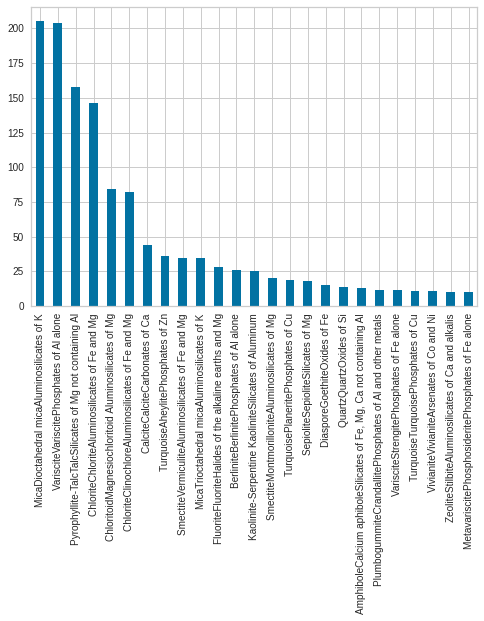

In [86]:
# Dividimos el dataset en variables independientes y target
X = df.drop(['target'], axis=1)
y = df['target']



# Aplicamos dos estrategias diferentes de eliminación de casos (undersampling) en las clases mayores
undersample = CondensedNearestNeighbour(sampling_strategy= ['VarisciteVariscitePhosphates of Al alone','MicaDioctahedral micaAluminosilicates of K'], n_neighbors=1, n_seeds_S= 200)
undersample2 = EditedNearestNeighbours(sampling_strategy= ['VarisciteVariscitePhosphates of Al alone','MicaDioctahedral micaAluminosilicates of K'], n_neighbors=5)
X_cnn2, y_cnn2 = undersample.fit_resample(X, y)
y_cnn2.value_counts().plot(kind='bar')
y_cnn2.value_counts()

VarisciteVariscitePhosphates of Al alone                              642
MicaDioctahedral micaAluminosilicates of K                            217
Pyrophyllite-TalcTalcSilicates of Mg not containing Al                158
ChloriteChloriteAluminosilicates of Fe and Mg                         146
ChloritoidMagnesiochloritoid Aluminosilicates of Mg                    84
ChloriteClinochloreAluminosilicates of Fe and Mg                       82
CalciteCalciteCarbonates of Ca                                         44
TurquoiseAheylitePhosphates of Zn                                      36
MicaTrioctahedral micaAluminosilicates of K                            35
SmectiteVermiculiteAluminosilicates of Fe and Mg                       35
FluoriteFluoriteHalides of the alkaline earths and Mg                  28
BerliniteBerlinitePhosphates of Al alone                               26
Kaolinite-Serpentine KaoliniteSilicates of Aluminum                    25
SmectiteMontmorilloniteAluminosilicate

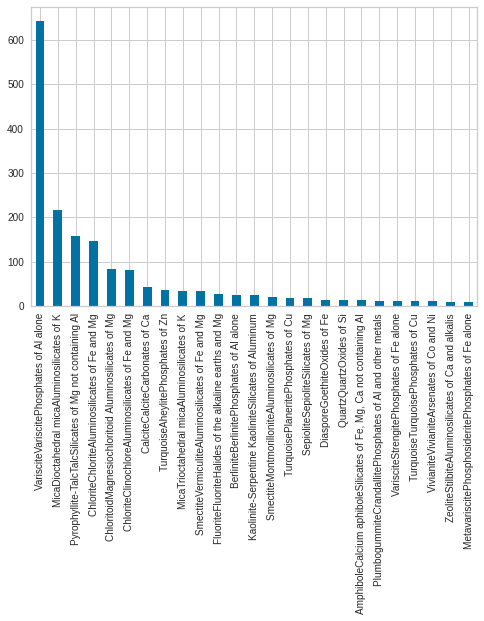

In [87]:
X_cnn3, y_cnn3 = undersample2.fit_resample(X, y)
y_cnn3.value_counts().plot(kind='bar')
y_cnn3.value_counts()

In [88]:
under_data = X_cnn3
under_data['target'] = y_cnn3

In [89]:
X = under_data.drop(['target'], axis=1)
y = under_data['target']

SmectiteVermiculiteAluminosilicates of Fe and Mg                      642
ChloritoidMagnesiochloritoid Aluminosilicates of Mg                   642
VivianiteVivianiteArsenates of Co and Ni                              642
ChloriteChloriteAluminosilicates of Fe and Mg                         642
FluoriteFluoriteHalides of the alkaline earths and Mg                 642
DiasporeGoethiteOxides of Fe                                          642
VarisciteStrengitePhosphates of Fe alone                              642
TurquoiseAheylitePhosphates of Zn                                     642
AmphiboleCalcium aphiboleSilicates of Fe, Mg, Ca not containing Al    642
Pyrophyllite-TalcTalcSilicates of Mg not containing Al                642
MetavariscitePhosphosideritePhosphates of Fe alone                    642
ZeoliteStilbiteAluminosilicates of Ca and alkalis                     642
PlumbogummiteCrandallitePhosphates of Al and other metals             642
TurquoiseTurquoisePhosphates of Cu    

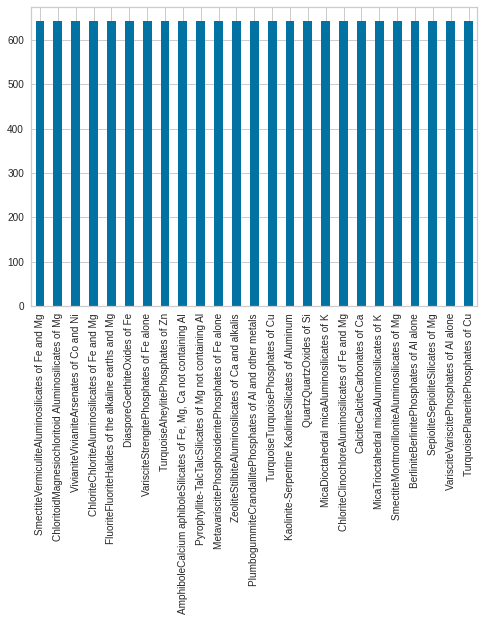

In [90]:

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)


y_smote.value_counts().plot(kind='bar')
y_smote.value_counts()

In [91]:
smote_data = X_smote
smote_data['target'] = y_smote

In [92]:
#Dividimos el dataset en subsets de antrenamiento y validación
#además dejamos una porción de la data sin usar para la evaluación final
data = smote_data.sample(frac=0.90, random_state=786)
data_unseen = smote_data.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data para el modelo: ' + str(data.shape))
print('Data para evaluación: ' + str(data_unseen.shape))

Data para el modelo: (14445, 46)
Data para evaluación: (1605, 46)


In [93]:
from pycaret.classification import *
#realizamos el setup del experimento y decidimos la proporción de data que usaremos para el trainning
experiment = setup(data=data, target= 'target',train_size=0.8, session_id=123)

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,"AmphiboleCalcium aphiboleSilicates of Fe, Mg, Ca not containing Al: 0, BerliniteBerlinitePhosphates of Al alone: 1, CalciteCalciteCarbonates of Ca: 2, ChloriteChloriteAluminosilicates of Fe and Mg: 3, ChloriteClinochloreAluminosilicates of Fe and Mg: 4, ChloritoidMagnesiochloritoid\xa0Aluminosilicates of Mg: 5, DiasporeGoethiteOxides of Fe: 6, FluoriteFluoriteHalides of the alkaline earths and Mg: 7, Kaolinite-Serpentine\xa0KaoliniteSilicates of Aluminum: 8, MetavariscitePhosphosideritePhosphates of Fe alone: 9, MicaDioctahedral micaAluminosilicates of K: 10, MicaTrioctahedral micaAluminosilicates of K: 11, PlumbogummiteCrandallitePhosphates of Al and other metals: 12, Pyrophyllite-TalcTalcSilicates of Mg not containing Al: 13, QuartzQuartzOxides of Si: 14, SepioliteSepioliteSilicates of Mg: 15, SmectiteMontmorilloniteAluminosilicates of Mg: 16, SmectiteVermiculiteAluminosilicates of Fe and Mg: 17, TurquoiseAheylitePhosphates of Zn: 18, TurquoisePlaneritePhosphates of Cu: 19, TurquoiseTurquoisePhosphates of Cu: 20, VarisciteStrengitePhosphates of Fe alone: 21, VarisciteVariscitePhosphates of Al alone: 22, VivianiteVivianiteArsenates of Co and Ni: 23, ZeoliteStilbiteAluminosilicates of Ca and alkalis: 24"
4,Original Data,"(14445, 46)"
5,Missing Values,False
6,Numeric Features,45
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [94]:
best = compare_models(exclude = ['lr', 'gbc'])#'lightgbm'

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9843,0.9992,0.9844,0.9845,0.9841,0.9836,0.9836,0.9270
lightgbm,Light Gradient Boosting Machine,0.9841,0.9996,0.9842,0.9843,0.9840,0.9834,0.9834,6.7080
rf,Random Forest Classifier,0.9779,0.9992,0.9781,0.9783,0.9777,0.9770,0.9770,2.9030
dt,Decision Tree Classifier,0.9354,0.9666,0.9356,0.9360,0.9351,0.9327,0.9327,0.2700
knn,K Neighbors Classifier,0.9175,0.9895,0.9177,0.9189,0.9169,0.9141,0.9142,0.7300
lda,Linear Discriminant Analysis,0.6552,0.9632,0.6562,0.6664,0.6496,0.6409,0.6419,0.0810
nb,Naive Bayes,0.5852,0.9623,0.5862,0.6209,0.5256,0.5680,0.5742,0.0590
ridge,Ridge Classifier,0.5537,0.0000,0.5539,0.5671,0.5104,0.5351,0.5399,0.0470
svm,SVM - Linear Kernel,0.4624,0.0000,0.4630,0.5199,0.4088,0.4400,0.4523,1.9070
qda,Quadratic Discriminant Analysis,0.1618,0.5679,0.1631,0.4015,0.1181,0.1272,0.1578,0.0600


In [97]:
# best models
et =create_model('et', class_weight="balanced")


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9870,0.9998,0.9871,0.9871,0.9870,0.9865,0.9865
1,0.9827,0.9992,0.9827,0.9829,0.9827,0.9820,0.9820
2,0.9862,0.9990,0.9863,0.9865,0.9861,0.9856,0.9856
3,0.9836,0.9991,0.9839,0.9839,0.9834,0.9829,0.9829
4,0.9844,0.9992,0.9847,0.9846,0.9843,0.9838,0.9838
5,0.9844,0.9992,0.9845,0.9846,0.9843,0.9838,0.9838
6,0.9861,0.9993,0.9862,0.9864,0.9860,0.9856,0.9856
7,0.9844,0.9999,0.9845,0.9852,0.9842,0.9838,0.9838
8,0.9827,0.9994,0.9828,0.9831,0.9826,0.9820,0.9820
9,0.9861,0.9997,0.9863,0.9863,0.9861,0.9856,0.9856


In [96]:
lbm = create_model('lightgbm', class_weight="balanced")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9888,0.9999,0.9888,0.9889,0.9888,0.9883,0.9883
1,0.9784,0.9996,0.9784,0.9785,0.9782,0.9775,0.9775
2,0.9827,0.9988,0.9828,0.9830,0.9826,0.9820,0.9820
3,0.9879,0.9995,0.9882,0.9881,0.9877,0.9874,0.9874
4,0.9870,0.9993,0.9872,0.9872,0.9870,0.9865,0.9865
5,0.9801,0.9997,0.9802,0.9803,0.9800,0.9793,0.9793
6,0.9818,0.9995,0.9817,0.9820,0.9817,0.9811,0.9811
7,0.9853,0.9999,0.9853,0.9854,0.9851,0.9847,0.9847
8,0.9870,0.9999,0.9872,0.9872,0.9869,0.9865,0.9865
9,0.9853,0.9999,0.9854,0.9853,0.9852,0.9847,0.9847


In [98]:
# tunning hiperparameters
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7379,0.9800,0.7389,0.7539,0.7321,0.7270,0.7280
1,0.7145,0.9741,0.7155,0.7341,0.7090,0.7026,0.7038
2,0.7093,0.9723,0.7110,0.7269,0.7006,0.6973,0.6986
3,0.7163,0.9740,0.7175,0.7444,0.7050,0.7044,0.7061
4,0.7362,0.9750,0.7372,0.7573,0.7294,0.7252,0.7264
5,0.7197,0.9727,0.7212,0.7434,0.7158,0.7080,0.7091
6,0.7160,0.9718,0.7169,0.7358,0.7092,0.7042,0.7055
7,0.7091,0.9733,0.7096,0.7248,0.7018,0.6970,0.6982
8,0.6970,0.9700,0.6983,0.7164,0.6902,0.6844,0.6857
9,0.7342,0.9749,0.7349,0.7579,0.7315,0.7231,0.7242


In [99]:
tuned_lbm = tune_model(lbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9792,0.9997,0.9794,0.9792,0.9791,0.9784,0.9784
1,0.9715,0.9992,0.9715,0.9716,0.9712,0.9703,0.9703
2,0.9749,0.9987,0.9751,0.9751,0.9747,0.9739,0.9739
3,0.9706,0.9995,0.9712,0.9707,0.9701,0.9694,0.9694
4,0.9810,0.9994,0.9812,0.9811,0.9809,0.9802,0.9802
5,0.9766,0.9992,0.9767,0.9768,0.9764,0.9757,0.9757
6,0.9801,0.9993,0.9802,0.9803,0.9799,0.9793,0.9793
7,0.9810,0.9998,0.9810,0.9810,0.9807,0.9802,0.9802
8,0.9775,0.9995,0.9778,0.9776,0.9773,0.9766,0.9766
9,0.9723,0.9995,0.9725,0.9724,0.9719,0.9711,0.9712


In [100]:

predict_model(tuned_et);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7141,0.9723,0.7148,0.7393,0.7055,0.7021,0.7035


In [101]:
predict_model(tuned_lbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9730,0.9996,0.9724,0.9730,0.9728,0.9719,0.9719


In [103]:
final_et = finalize_model(tuned_et)
predict_model(final_et);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7165,0.9736,0.7172,0.7426,0.7081,0.7046,0.7061


In [104]:
final_lbm = finalize_model(tuned_lbm)
predict_model(final_lbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9997,1.0000,0.9996,0.9997,0.9997,0.9996,0.9996


In [105]:
unseen_predictions = predict_model(final_et, data=data_unseen)
unseen_predictions['Label']
x = unseen_predictions['target'] == unseen_predictions['Label']
unseen_predictions['error'] = x


unseen_predictions['error'].value_counts()


True     1130
False     475
Name: error, dtype: int64

In [118]:
unseen_predictions = predict_model(final_lbm, data=data_unseen)
unseen_predictions['Label']
x = unseen_predictions['target'] == unseen_predictions['Label']
unseen_predictions['error'] = x


unseen_predictions['error'].value_counts()
#unseen_predictions.shape

True     1579
False      26
Name: error, dtype: int64

In [116]:
#data_unseen_final

unseen_predictions_final = predict_model(final_lbm, data=data_unseen_final)
#unseen_predictions_final['Label']
upf = unseen_predictions_final['target'] == unseen_predictions_final['Label']
unseen_predictions_final['error'] = upf


unseen_predictions_final['error'].value_counts()

#unseen_predictions_final.shape

True     183
False     27
Name: error, dtype: int64

In [46]:
# Guardamos el archivo producto de las predicciones a los datos de validación para posteriores análisis
#unseen_predictions.to_csv("/media/dsg/TOSHIBA EXT/PhD/DATA/pycaret_exp5/unseen_predicitons5_a.csv")


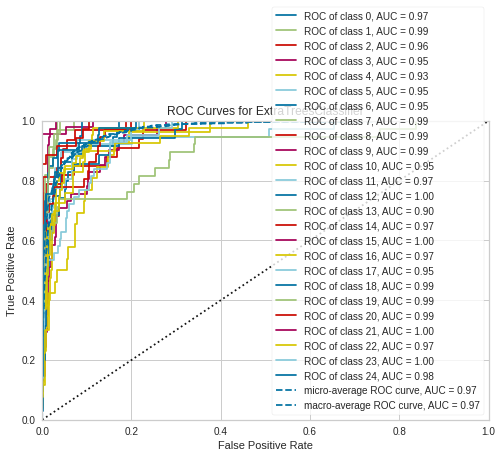

In [43]:
plot_model(final_et, plot = 'auc', scale=1)

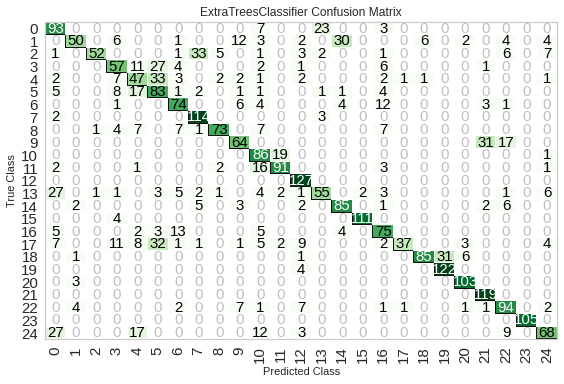

In [107]:
plot_model(final_et, plot = 'confusion_matrix')

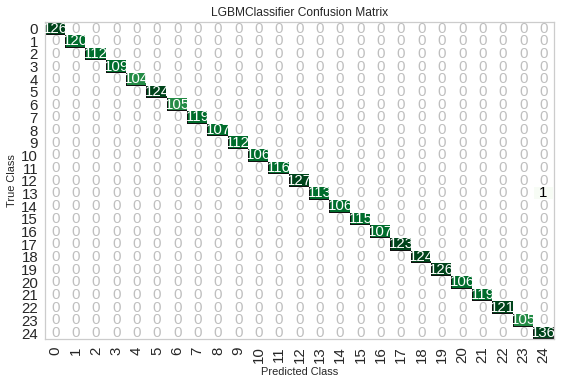

In [109]:
plot_model(final_lbm, plot = 'confusion_matrix')

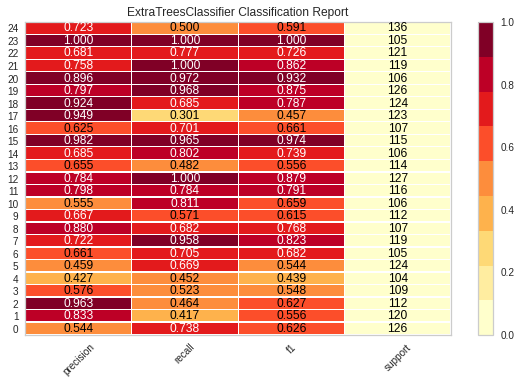

In [110]:
plot_model(final_et, plot = 'class_report')

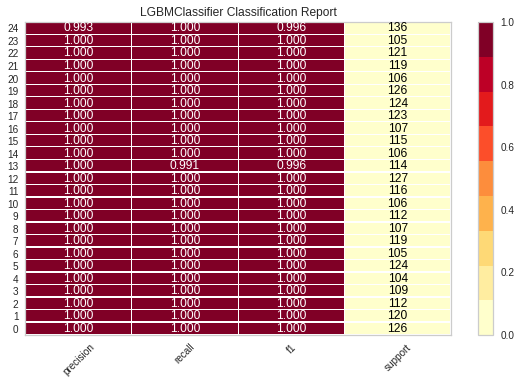

In [111]:
plot_model(final_lbm, plot = 'class_report')

In [119]:
save_model(final_lbm, model_name = 'deployment_14082022')



Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', learning_rate=0.1,
                                 max_depth=-1, min_child_samples=66,
                                 min_child_weight=0

Package                           Version
--------------------------------- -------------------
alabaster                         0.7.8
alembic                           1.4.1
altair                            4.1.0
appdirs                           1.4.4
apturl                            0.5.2
argon2-cffi                       20.1.0
asgiref                           3.2.7
asn1crypto                        0.24.0
astroid                           1.6.0
async-generator                   1.10
attrs                             20.3.0
Automat                           20.2.0
autopep8                          1.5.5
Babel                             2.4.0
backcall                          0.2.0
backports.entry-points-selectable 1.1.0
backports.zoneinfo                0.2.1
beautifulsoup4                    4.9.3
bleach                            3.2.1
blinker                           1.4
blis                              0.7.4
Boruta                            0.3
Brlapi                   